# Introduction to Data Analysis in Python

## Part II - Data analysis using the `pandas` library

### Instructor: Abdoulaye Balde

<hr style="height:2px; border:none; color:black; background-color:black;">

### Pandas is a flexible and powerful Python library for data analysis (https://pandas.pydata.org/).

To use pandas, we first need to import the `pandas` library.

In [1]:
import pandas as pd

### Loading a data file

#### Let's use a data set of police-reported road crashes that involves pedestrians in Wayne County, MI (2010-2018). 

Data source: 
https://www.michigantrafficcrashfacts.org/querytool/table/2#q1;2;2018;o82;0,37:1|2,3:1&p0,4:0,2:0,3:0,5:0,6:0,8:0,54:0,31:0,24:0,76:0,16:0,49:2,3:2,9:2,10||0|1000

#### The data file is `ped_crashes.csv`

First let's use the pandas `read_csv` function to read in the data set from the CSV (Comma-Separated Values) file.




In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/abdoulayegk/Workshop/master/ped_crashes.csv")

We can take a quick look at the loaded data (called a "dataframe") using pandas method `.head()` or `.tail()`. 

It checks the first or last few rows of the dataframe.

In [4]:
df.head()

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
0,2018,February,1.0,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
1,2018,February,1.0,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
2,2018,February,1.0,11:00 AM - 12:00 noon,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),Motor vehicle driver,DOB invalid,Uncoded & errors
3,2018,February,1.0,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
4,2018,March,1.0,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Snow,25,No injury (O),Motor vehicle driver,DOB invalid,Uncoded & errors


In [5]:
df.tail()

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
6804,2010,July,31.0,2:00 AM - 3:00 AM,Saturday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark unlighted,Uncoded & errors,25,Fatal injury (K),Motor vehicle driver,DOB invalid,Uncoded & errors
6805,2010,August,31.0,2:00 PM - 3:00 PM,Tuesday,Wayne County: Livonia,Intersection crash,Not hit-and-run,Daylight,Uncoded & errors,40,Suspected minor injury (B),Motor vehicle driver,22,Female
6806,2010,October,31.0,8:00 PM - 9:00 PM,Sunday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Uncoded & errors,15,Possible injury (C),Motor vehicle driver,DOB invalid,Uncoded & errors
6807,2010,December,31.0,1:00 PM - 2:00 PM,Friday,Wayne County: Wayne,Intersection crash,Hit-and-run,Daylight,Uncoded & errors,35,Possible injury (C),Motor vehicle driver,DOB invalid,Male
6808,2010,December,31.0,10:00 PM - 11:00 PM,Friday,Wayne County: Dearborn,Not intersection crash,Not hit-and-run,Dark lighted,Uncoded & errors,35,Possible injury (C),Motor vehicle driver,55,Male


Pandas `.shape` attribute returns the dataframe's dimensionality (numbers of rows and columns).

In [6]:
df.shape

(6809, 15)

### Checking data types

The data set has texts and numbers. We need to check they are indeed what they should be in the dataframe.

Pandas `.dtypes` attribute returns the data type of each column. 

In [7]:
df.dtypes

Crash Year                      int64
Crash Month                    object
Crash Day                     float64
Time of Day                    object
Day of Week                    object
City or Township               object
Crash: Intersection            object
Crash: Hit-and-Run             object
Lighting Conditions            object
Weather Conditions (2016+)     object
Speed Limit at Crash Site      object
Worst Injury in Crash          object
Party Type                     object
Person Age                     object
Person Gender                  object
dtype: object

Using **describe** method to see the statistical summary of all numeric data

In [8]:
df.describe()

,Crash Year,Crash Day
count,6809.000000,6809.000000
mean,2013.992216,15.384197
std,2.597471,8.701025
min,2010.000000,1.000000
25%,2012.000000,8.000000
50%,2014.000000,15.000000
75%,2016.000000,23.000000
max,2018.000000,31.000000


In [9]:
df.describe(include = 'all')

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
count,6809.000000,6809,6809.000000,6809,6809,6809,6809,6809,6809,6809,6809,6809,6809,6809,6809
unique,NaN,12,NaN,25,7,43,2,2,8,10,15,5,1,87,3
top,NaN,October,NaN,6:00 PM - 7:00 PM,Friday,Wayne County: Detroit,Not intersection crash,Not hit-and-run,Daylight,Uncoded & errors,25,Possible injury (C),Motor vehicle driver,DOB invalid,Male
freq,NaN,695,NaN,535,1078,4543,3852,4300,3630,4613,2233,2489,6809,2470,2905
mean,2013.992216,NaN,15.384197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.597471,NaN,8.701025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2010.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2012.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2014.000000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pandas `.columns` attribute returns the column headers.

In [11]:
df.columns.to_list()

['Crash Year',
 'Crash Month',
 'Crash Day',
 'Time of Day',
 'Day of Week',
 'City or Township',
 'Crash: Intersection',
 'Crash: Hit-and-Run',
 'Lighting Conditions',
 'Weather Conditions (2016+)',
 'Speed Limit at Crash Site',
 'Worst Injury in Crash',
 'Party Type',
 'Person Age',
 'Person Gender']

In [14]:
list(df.columns)

['Crash Year',
 'Crash Month',
 'Crash Day',
 'Time of Day',
 'Day of Week',
 'City or Township',
 'Crash: Intersection',
 'Crash: Hit-and-Run',
 'Lighting Conditions',
 'Weather Conditions (2016+)',
 'Speed Limit at Crash Site',
 'Worst Injury in Crash',
 'Party Type',
 'Person Age',
 'Person Gender']

the **info** method will return a pandas dataframe with all non null counted for each column with the datatype
it will also tell us how much memory we used

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crash Year                  6809 non-null   int64  
 1   Crash Month                 6809 non-null   object 
 2   Crash Day                   6809 non-null   float64
 3   Time of Day                 6809 non-null   object 
 4   Day of Week                 6809 non-null   object 
 5   City or Township            6809 non-null   object 
 6   Crash: Intersection         6809 non-null   object 
 7   Crash: Hit-and-Run          6809 non-null   object 
 8   Lighting Conditions         6809 non-null   object 
 9   Weather Conditions (2016+)  6809 non-null   object 
 10  Speed Limit at Crash Site   6809 non-null   object 
 11  Worst Injury in Crash       6809 non-null   object 
 12  Party Type                  6809 non-null   object 
 13  Person Age                  6809 

### Renaming column names
The original column names have spaces (and are long-ish), which may make the dataframe a little harder to work with. Let's rename them.

To rename columns names, we can assign a list of new column names to the dataframe's `columns` attribute. 

If we want to rename only one or a few of the columns, it's handy to use the `.rename` method. 

In [21]:
rename_list = ['year', 'month', 'day', 'timeofday', 'dayofweek', 'city', 'intersection'
               , 'hitandrun', 'lighting', 'weather', 'speedlimit', 'worstinjury', 'partytype', 'age', 'gender']

In [22]:
df.columns = rename_list

In [23]:
# 'year', 'month', 'day', 'timeofday', 'dayofweek', 'city', 'intersection', 'hitandrun', 
#                  'lighting', 'weather', 'speedlimit', 'worstinjury', 'partytype', 'age', 'gender'
df.head()

,year,month,day,timeofday,dayofweek,city,intersection,hitandrun,lighting,weather,speedlimit,worstinjury,partytype,age,gender
0,2018,February,1.0,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
1,2018,February,1.0,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
2,2018,February,1.0,11:00 AM - 12:00 noon,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),Motor vehicle driver,DOB invalid,Uncoded & errors
3,2018,February,1.0,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
4,2018,March,1.0,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Snow,25,No injury (O),Motor vehicle driver,DOB invalid,Uncoded & errors


In [25]:
df.rename(columns = {'year':'Year', 'month':'Month'},inplace =True)

In [26]:
df.head()

,Year,Month,day,timeofday,dayofweek,city,intersection,hitandrun,lighting,weather,speedlimit,worstinjury,partytype,age,gender
0,2018,February,1.0,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
1,2018,February,1.0,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
2,2018,February,1.0,11:00 AM - 12:00 noon,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),Motor vehicle driver,DOB invalid,Uncoded & errors
3,2018,February,1.0,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
4,2018,March,1.0,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Snow,25,No injury (O),Motor vehicle driver,DOB invalid,Uncoded & errors


### Replacing space by underoscore (_)

### Checking missing values
In many real-world datasets you'll find missing values. These can interfere with data analysis processes, so we check for these first.

In [28]:
df.isnull().sum()

Year            0
Month           0
day             0
timeofday       0
dayofweek       0
city            0
intersection    0
hitandrun       0
lighting        0
weather         0
speedlimit      0
worstinjury     0
partytype       0
age             0
gender          0
dtype: int64

In [31]:
import numpy as np
df.head()

,Year,Month,day,timeofday,dayofweek,city,intersection,hitandrun,lighting,weather,speedlimit,worstinjury,partytype,age,gender
0,2018,February,1.0,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
1,2018,February,1.0,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
2,2018,February,1.0,11:00 AM - 12:00 noon,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),Motor vehicle driver,DOB invalid,Uncoded & errors
3,2018,February,1.0,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
4,2018,March,1.0,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Snow,25,No injury (O),Motor vehicle driver,DOB invalid,Uncoded & errors


In [34]:
df.replace ({'DOB invalid':np.nan,'Uncoded & errors':np.nan}, inplace =True )
df.head()

,Year,Month,day,timeofday,dayofweek,city,intersection,hitandrun,lighting,weather,speedlimit,worstinjury,partytype,age,gender
0,2018,February,1.0,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,NaN,NaN
1,2018,February,1.0,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
2,2018,February,1.0,11:00 AM - 12:00 noon,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),Motor vehicle driver,NaN,NaN
3,2018,February,1.0,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),Motor vehicle driver,NaN,NaN
4,2018,March,1.0,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Snow,25,No injury (O),Motor vehicle driver,NaN,NaN


In [33]:
df.isnull().sum()

Year               0
Month              0
day                0
timeofday          0
dayofweek          0
city               0
intersection       0
hitandrun          0
lighting           2
weather         4613
speedlimit       279
worstinjury        0
partytype          0
age             2470
gender          1911
dtype: int64

### Subsetting columns
To select a single column we can use something like either `crash.city` or `crash['city]`. 

To select multiple columns we can use something like `crash[['city', 'lighting', 'speedlimit']]`

In [36]:
df['city']

0        Wayne County: Detroit
1        Wayne County: Detroit
2        Wayne County: Detroit
3        Wayne County: Detroit
4        Wayne County: Detroit
                 ...          
6804     Wayne County: Detroit
6805     Wayne County: Livonia
6806     Wayne County: Detroit
6807       Wayne County: Wayne
6808    Wayne County: Dearborn
Name: city, Length: 6809, dtype: object

In [37]:
df[['city','speedlimit']]

,city,speedlimit
0,Wayne County: Detroit,35
1,Wayne County: Detroit,30
2,Wayne County: Detroit,30
3,Wayne County: Detroit,30
4,Wayne County: Detroit,25
...,...,...
6804,Wayne County: Detroit,25
6805,Wayne County: Livonia,40
6806,Wayne County: Detroit,15
6807,Wayne County: Wayne,35


### Value counts
Pandas `value_counts()` method gives us the number of times each value shows up in the given column (often called a pandas Series).

In [39]:
df['gender'].value_counts()

Male      2905
Female    1993
Name: gender, dtype: int64

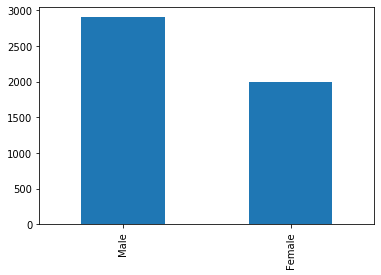

In [43]:
df.gender.value_counts().plot(kind = 'bar')

### Number of unique values
Pandas `nunique()` method gives us the number of unique values in a column

In [44]:
df.gender.nunique()

2

In [45]:
df.gender.unique()

array([nan, 'Female', 'Male'], dtype=object)

### Filtering a dataframe

In [49]:
# find the data for the year 2018
df.Year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010])

In [50]:
df[df['Year'].between(2010,2015)]

,Year,Month,day,timeofday,dayofweek,city,intersection,hitandrun,lighting,weather,speedlimit,worstinjury,partytype,age,gender
2196,2015,January,1.0,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Intersection crash,Not hit-and-run,Daylight,NaN,30,Fatal injury (K),Motor vehicle driver,23,Male
2197,2015,March,1.0,10:00 PM - 11:00 PM,Sunday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark unlighted,NaN,25,Possible injury (C),Motor vehicle driver,NaN,Male
2198,2015,May,1.0,9:00 PM - 10:00 PM,Friday,Wayne County: Garden City,Not intersection crash,Not hit-and-run,Dusk,NaN,25,Suspected minor injury (B),Motor vehicle driver,51,Male
2199,2015,May,1.0,9:00 PM - 10:00 PM,Friday,Wayne County: Garden City,Not intersection crash,Not hit-and-run,Dusk,NaN,25,Suspected minor injury (B),Motor vehicle driver,NaN,NaN
2200,2015,May,1.0,10:00 PM - 11:00 PM,Friday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,NaN,30,Possible injury (C),Motor vehicle driver,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,2010,July,31.0,2:00 AM - 3:00 AM,Saturday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark unlighted,NaN,25,Fatal injury (K),Motor vehicle driver,NaN,NaN
6805,2010,August,31.0,2:00 PM - 3:00 PM,Tuesday,Wayne County: Livonia,Intersection crash,Not hit-and-run,Daylight,NaN,40,Suspected minor injury (B),Motor vehicle driver,22,Female
6806,2010,October,31.0,8:00 PM - 9:00 PM,Sunday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,NaN,15,Possible injury (C),Motor vehicle driver,NaN,NaN
6807,2010,December,31.0,1:00 PM - 2:00 PM,Friday,Wayne County: Wayne,Intersection crash,Hit-and-run,Daylight,NaN,35,Possible injury (C),Motor vehicle driver,NaN,Male


In [18]:
# crash year between 2015 to 2018 using between attribute

In [58]:
df[df.Year == 2010]

,Year,Month,day,timeofday,dayofweek,city,intersection,hitandrun,lighting,weather,speedlimit,worstinjury,partytype,age,gender
6054,2010,January,1.0,12:00 midnight - 1:00 AM,Friday,Wayne County: Detroit,Not intersection crash,Not hit-and-run,Dark lighted,NaN,35,Suspected minor injury (B),Motor vehicle driver,55,Male
6055,2010,February,1.0,4:00 PM - 5:00 PM,Monday,Wayne County: Detroit,Not intersection crash,Not hit-and-run,Daylight,NaN,30,No injury (O),Motor vehicle driver,26,Female
6056,2010,February,1.0,7:00 AM - 8:00 AM,Monday,Wayne County: Detroit,Not intersection crash,Not hit-and-run,Dawn,NaN,30,Suspected minor injury (B),Motor vehicle driver,36,Female
6057,2010,February,1.0,9:00 AM - 10:00 AM,Monday,Wayne County: Detroit,Intersection crash,Not hit-and-run,Daylight,NaN,25,Possible injury (C),Motor vehicle driver,55,Male
6058,2010,March,1.0,8:00 AM - 9:00 AM,Monday,Wayne County: Detroit,Not intersection crash,Not hit-and-run,Daylight,NaN,35,Possible injury (C),Motor vehicle driver,33,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,2010,July,31.0,2:00 AM - 3:00 AM,Saturday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark unlighted,NaN,25,Fatal injury (K),Motor vehicle driver,NaN,NaN
6805,2010,August,31.0,2:00 PM - 3:00 PM,Tuesday,Wayne County: Livonia,Intersection crash,Not hit-and-run,Daylight,NaN,40,Suspected minor injury (B),Motor vehicle driver,22,Female
6806,2010,October,31.0,8:00 PM - 9:00 PM,Sunday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,NaN,15,Possible injury (C),Motor vehicle driver,NaN,NaN
6807,2010,December,31.0,1:00 PM - 2:00 PM,Friday,Wayne County: Wayne,Intersection crash,Hit-and-run,Daylight,NaN,35,Possible injury (C),Motor vehicle driver,NaN,Male


In [60]:
# find the crash for the day 1 and month january using & operator
df[(df['day']==1)&(df.Month=='January')]

,Year,Month,day,timeofday,dayofweek,city,intersection,hitandrun,lighting,weather,speedlimit,worstinjury,partytype,age,gender
822,2017,January,1.0,2:00 AM - 3:00 AM,Sunday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,35,Possible injury (C),Motor vehicle driver,NaN,NaN
823,2017,January,1.0,6:00 PM - 7:00 PM,Sunday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,35,Possible injury (C),Motor vehicle driver,NaN,NaN
824,2017,January,1.0,10:00 PM - 11:00 PM,Sunday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark unlighted,Clear,25,Suspected serious injury (A),Motor vehicle driver,NaN,NaN
825,2017,January,1.0,10:00 PM - 11:00 PM,Sunday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark unlighted,Clear,25,No injury (O),Motor vehicle driver,NaN,NaN
1545,2016,January,1.0,1:00 AM - 2:00 AM,Friday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,25,Fatal injury (K),Motor vehicle driver,NaN,NaN
1546,2016,January,1.0,1:00 AM - 2:00 AM,Friday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,25,Suspected minor injury (B),Motor vehicle driver,NaN,NaN
2196,2015,January,1.0,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Intersection crash,Not hit-and-run,Daylight,NaN,30,Fatal injury (K),Motor vehicle driver,23,Male
2997,2014,January,1.0,4:00 PM - 5:00 PM,Wednesday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,NaN,30,Possible injury (C),Motor vehicle driver,NaN,NaN
3762,2013,January,1.0,6:00 PM - 7:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,NaN,30,Possible injury (C),Motor vehicle driver,NaN,NaN
4550,2012,January,1.0,6:00 AM - 7:00 AM,Sunday,Wayne County: Livonia,Intersection crash,Hit-and-run,Dark lighted,NaN,45,Fatal injury (K),Motor vehicle driver,NaN,NaN


In [61]:
# use the same for or operator | as well
df[(df.Year==1)|(df.Month== 'January')]

,Year,Month,day,timeofday,dayofweek,city,intersection,hitandrun,lighting,weather,speedlimit,worstinjury,partytype,age,gender
75,2018,January,4.0,12:00 noon - 1:00 PM,Thursday,Wayne County: Grosse Pointe,Intersection crash,Not hit-and-run,Daylight,Clear,25,Possible injury (C),Motor vehicle driver,53,Female
76,2018,January,4.0,5:00 PM - 6:00 PM,Thursday,Wayne County: Grosse Pointe Park,Intersection crash,Not hit-and-run,Unknown,Unknown,35,Possible injury (C),Motor vehicle driver,60,Female
101,2018,January,5.0,11:00 AM - 12:00 noon,Friday,Wayne County: Taylor,Intersection crash,Not hit-and-run,Daylight,Clear,5,Possible injury (C),Motor vehicle driver,46,Male
128,2018,January,6.0,9:00 AM - 10:00 AM,Saturday,Wayne County: Inkster,Not intersection crash,Not hit-and-run,Daylight,Snow,40,Possible injury (C),Motor vehicle driver,19,Female
129,2018,January,6.0,2:00 PM - 3:00 PM,Saturday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Clear,30,No injury (O),Motor vehicle driver,NaN,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6759,2010,January,29.0,10:00 AM - 11:00 AM,Friday,Wayne County: Detroit,Not intersection crash,Not hit-and-run,Daylight,NaN,NaN,Possible injury (C),Motor vehicle driver,NaN,Male
6775,2010,January,30.0,2:00 AM - 3:00 AM,Saturday,Wayne County: Melvindale,Not intersection crash,Hit-and-run,Dark lighted,NaN,25,Suspected minor injury (B),Motor vehicle driver,26,Female
6776,2010,January,30.0,2:00 AM - 3:00 AM,Saturday,Wayne County: Melvindale,Not intersection crash,Hit-and-run,Dark lighted,NaN,25,Suspected minor injury (B),Motor vehicle driver,NaN,NaN
6777,2010,January,30.0,1:00 AM - 2:00 AM,Saturday,Wayne County: Detroit,Not intersection crash,Not hit-and-run,Dark unlighted,NaN,25,Possible injury (C),Motor vehicle driver,40,Male


### Creating a new column

In [62]:
df['Null'] = 8

### Deleting a column
Pandas `.drop` method allows us to delete a list of columns by name.

In [67]:
df.drop('Null', axis = 1, inplace =True)

In [68]:
df.head()

,Year,Month,day,timeofday,dayofweek,city,intersection,hitandrun,lighting,weather,speedlimit,worstinjury,partytype,age,gender
0,2018,February,1.0,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,NaN,NaN
1,2018,February,1.0,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
2,2018,February,1.0,11:00 AM - 12:00 noon,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),Motor vehicle driver,NaN,NaN
3,2018,February,1.0,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),Motor vehicle driver,NaN,NaN
4,2018,March,1.0,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Snow,25,No injury (O),Motor vehicle driver,NaN,NaN


### Accessing a row
Pandas `.iloc` method allows us to access specified rows by position.

## Exercises

### 1. Rename some of the column names in the `credit` dataframe  (e.g., from "speedlimit" to "Speed_Limit").

### Once done, check the dataframe to make sure they are indeed renamed.

In [73]:
df[df['worstinjury']=='Fatal injury (K)'].shape[0]

514

### 3. What percentage of the crashes are fatal?

In [69]:
df.worstinjury.unique()

array(['Suspected minor injury (B)', 'Suspected serious injury (A)',
       'Possible injury (C)', 'No injury (O)', 'Fatal injury (K)'],
      dtype=object)

In [70]:
df.worstinjury.value_counts()

Possible injury (C)             2489
Suspected minor injury (B)      1730
Suspected serious injury (A)    1083
No injury (O)                    993
Fatal injury (K)                 514
Name: worstinjury, dtype: int64

In [71]:
df[df['worstinjury']=='Fatal injury (K)'].shape[0]/len(df)

0.07548832427669261

# Data visualization with matplotlib and seaborn

### Matplotlib is a powerful Python library for data visualization (https://matplotlib.org/)
### We will first need to import the matplotlib library.

https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

# Seaborn

### Seaborn is a statistical data visualization library in Python. It is based on matplotlib.

For examples of what seaborn can do, see https://seaborn.pydata.org/examples/index.html



#### load data and store in dataframe df:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [74]:
data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')

In [75]:
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1




How to choose the right visualization method?

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.


In [1]:
# finding the data types

In [76]:
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns


### Continuous numerical variables:

Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

Let's see several examples of different linear relationships:
Positive linear relationship

Let's find the scatterplot of "engine-size" and "price"


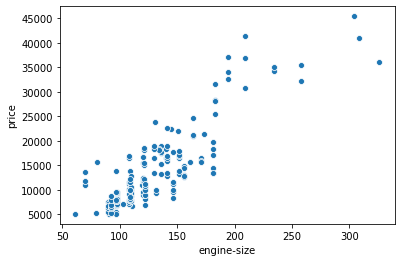

In [79]:
sns.scatterplot(x='engine-size',y='price', data= data)

In [81]:
data[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### Find the correlation of the whole dataset <br>
Note: it will show only for the datatypes float , int
use regplot to show it

In [82]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


#### Find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower.

Hint: if you would like to select those columns use the following syntax: df[['bore','stroke' ,'compression-ratio','horsepower']]

In [83]:
data[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### how is the relationship between peak-rpm and price?
Let's see if "Peak-rpm" as a predictor variable of "price".

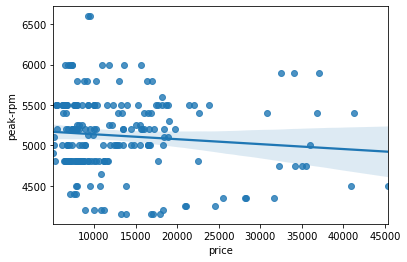

In [84]:
sns.regplot(x='price',y='peak-rpm',data = data)

### Find to correlation to conform your finding on the plot

In [85]:
data[['price','peak-rpm']].corr()

,price,peak-rpm
price,1.000000,-0.101616
peak-rpm,-0.101616,1.000000


### Given the correlation results between "price" and "stroke" do you expect a linear relationship?

Verify your results using the function "regplot()"

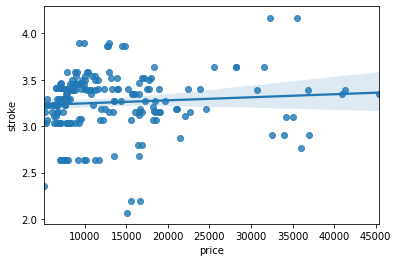

In [86]:
sns.regplot(x='price',y='stroke', data =data)


### Categorical variables

#### These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Let's look at the relationship between "body-style" and "price".


In [2]:
# using regplot

In [3]:
# using corr function

## Basics of Grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.


In [87]:
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### what is the avarage price of each car?

In [88]:
data.groupby('make')['price'].mean()

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64

### Countplot seabron
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

In [21]:
# using seabron load titanic dataset 

In [89]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


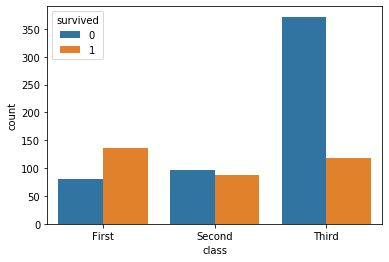

In [92]:
sns.countplot(titanic['class'], hue = 'survived', data = titanic)

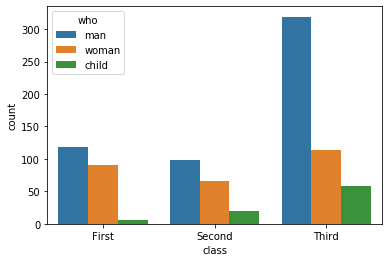

In [91]:
sns.countplot(titanic['class'], hue='who', data = titanic)

### Contact me:
Twitter: https://twitter.com/abdoulayegk <br>
Github: https://github.com/abdoulayegk <br>
LinkedIn : https://www.linkedin.com/in/abdoulaye-balde-450152128/



### Further resources on pandas


* Data Wrangling with pandas Cheat Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf


* Pandas official documentation: https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html





###Further resources on matplotlib

   ### Matplotlib official tutorials: https://matplotlib.org/tutorials/index.html

Python Data Science Handbook, Chapter 4: https://jakevdp.github.io/PythonDataScienceHandbook/index.html#4.-Visualization-with-Matplotlib
